In [2]:
from pathlib import Path
from tqdm import tqdm
import cv2
import numpy as np
import ray
import json
import pickle

## The high-density labels seem to cover train_1

In [8]:
dset_sequences = ["02cf0ce1-699a-373b-86c0-eb6fd5f4697a", "043aeba7-14e5-3cde-8a5c-639389b6d3a6", "08a8b7f0-c317-3bdb-b3dc-b7c9b6d033e2", "0ef28d5c-ae34-370b-99e7-6709e1c4b929", "10b3a1d8-e56c-38be-aaf7-ef2f862a5c4e", "10b8dee6-778f-33e4-a946-d842d2d9c3d7", "10f92308-e06e-3725-a302-4b09e6e790ad", "11953248-1195-1195-1195-511954366464", "15c802a9-0f0e-3c87-b516-a3fa02f1ecb0", "22160544-2216-2216-2216-722161741824", "230970eb-dc2e-3133-b252-ff3c6f5d4284", "25952736-2595-2595-2595-225953853440", "26d141ec-f952-3908-b4cc-ae359377424e", "273c1883-673a-36bf-b124-88311b1a80be", "29789600-2979-2979-2979-429790834688", "2bc6a872-9979-3493-82eb-fb55407473c9", "2c07fcda-6671-3ac0-ac23-4a232e0e031e", "3138907e-1f8a-362f-8f3d-773f795a0d01", "38b2c7ef-069b-3d9d-bbeb-8847b8c89fb6", "3d20ae25-5b29-320d-8bae-f03e9dc177b9", "4137e94a-c5da-38bd-ad06-6d57b24bccd0", "45753856-4575-4575-4575-345754906624", "49d66e75-3ce6-316b-b589-f659c7ef5e6d", "52af191b-ba56-326c-b569-e37790db40f3", "53037376-5303-5303-5303-553038557184", "53213cf0-540b-3b5a-9900-d24d1d41bda0", "577ea60d-7cc0-34a4-a8ff-0401e5ab9c62", "5c251c22-11b2-3278-835c-0cf3cdee3f44", "6162d72f-2990-3a30-9bba-19bbd882985c", "649750f3-0163-34eb-a102-7aaf5384eaec", "64c12551-adb9-36e3-a0c1-e43a0e9f3845", "6c739f57-96d0-33e6-972d-af29cc527e1f", "6f153f9c-edc5-389f-ac6f-40705c30d97e", "74750688-7475-7475-7475-474752397312", "75756160-7575-7575-7575-675757273088", "84c35ea7-1a99-3a0c-a3ea-c5915d68acbc", "88538208-8853-8853-8853-388539396096", "8a15674a-ae5c-38e2-bc4b-f4156d384072", "91326240-9132-9132-9132-591327440896", "919be600-da69-3f09-b0fd-f42f7eb2e097", "95731808-9573-9573-9573-295732883456", "99c45b6e-6fc7-39b8-80d7-727c485fb561", "9da4ca63-f524-3b38-8c8b-624f17518574", "a073e840-6319-3f0b-843e-f6dccdcc7b77", "a6cab660-f086-3e2a-8ad9-7144f93f5b68", "aebe6aaa-6a95-39e6-9a8d-06103141fcde", "af706af1-a226-3f6f-8d65-b1f4b9457c48", "b3def699-884b-3c9e-87e1-1ab76c618e0b", "ba067318-0d89-34b5-b577-b171b1a4212b", "bae67a44-0f30-30c1-8999-06fc1c7ab80a", "c6911883-1843-3727-8eaa-41dc8cda8993", "cd38ac0b-c5a6-3743-a148-f4f7b804ed17", "d4d9e91f-0f8e-334d-bd0e-0d062467308a", "d60558d2-d1aa-34ee-a902-e061e346e02a", "dcdcd8b3-0ba1-3218-b2ea-7bb965aad3f0", "de777454-df62-3d5a-a1ce-2edb5e5d4922", "e17eed4f-3ffd-3532-ab89-41a3f24cf226", "e8ce69b2-36ab-38e8-87a4-b9e20fee7fd2", "e9bb51af-1112-34c2-be3e-7ebe826649b4", "ebe7a98b-d383-343b-96d6-9e681e2c6a36", "f0826a9f-f46e-3c27-97af-87a77f7899cd", "f3fb839e-0aa2-342b-81c3-312b80be44f9", "fa0b626f-03df-35a0-8447-021088814b8b", "fb471bd6-7c81-3d93-ad12-ac54a28beb84", "ff78e1a3-6deb-34a4-9a1f-b85e34980f06"]

In [9]:
train_1_sequences = ["043aeba7-14e5-3cde-8a5c-639389b6d3a6", "230970eb-dc2e-3133-b252-ff3c6f5d4284", "3d20ae25-5b29-320d-8bae-f03e9dc177b9", "88538208-8853-8853-8853-388539396096", "c6911883-1843-3727-8eaa-41dc8cda8993", "10b3a1d8-e56c-38be-aaf7-ef2f862a5c4e", "25952736-2595-2595-2595-225953853440", "64c12551-adb9-36e3-a0c1-e43a0e9f3845", "8a15674a-ae5c-38e2-bc4b-f4156d384072", "dcdcd8b3-0ba1-3218-b2ea-7bb965aad3f0", "10b8dee6-778f-33e4-a946-d842d2d9c3d7", "26d141ec-f952-3908-b4cc-ae359377424e", "6f153f9c-edc5-389f-ac6f-40705c30d97e", "a073e840-6319-3f0b-843e-f6dccdcc7b77", "e17eed4f-3ffd-3532-ab89-41a3f24cf226", "11953248-1195-1195-1195-511954366464", "273c1883-673a-36bf-b124-88311b1a80be", "84c35ea7-1a99-3a0c-a3ea-c5915d68acbc", "b3def699-884b-3c9e-87e1-1ab76c618e0b", "f3fb839e-0aa2-342b-81c3-312b80be44f9"]

In [10]:
set(train_1_sequences) - set(dset_sequences)

set()

In [11]:
set([1,5]) - set([1,2,3,4]), set([1,2]) - set([1,2,3,4])

({5}, set())

## Examining train_1

### Take one sequence from train1, sort jpg files inside it in increasing index order

In [30]:
@ray.remote
def save_as_gif(sequence_path):
    seq_name = sequence_path.parent.stem
    sequence_images = sorted(sequence_path.iterdir(), key=lambda path: int(path.stem.split("_")[-1]))
    import imageio
    with imageio.get_writer('{}.gif'.format(seq_name), mode='I') as writer:
        for path in tqdm(sequence_images):
            image = imageio.imread(path)
            image = imageio.core.util.Array(cv2.resize(np.array(image.data), dsize=(640, 400), interpolation=cv2.INTER_CUBIC))
            writer.append_data(image)

In [27]:
Path("/data/ges/argoverse-tracking/train1/88538208-8853-8853-8853-388539396096/ring_front_center").parent.stem

'88538208-8853-8853-8853-388539396096'

In [31]:
ray.shutdown()
ray.init()

2020-11-06 12:51:09,296	INFO resource_spec.py:231 -- Starting Ray with 45.61 GiB memory available for workers and up to 22.82 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-11-06 12:51:09,684	INFO services.py:1193 -- View the Ray dashboard at localhost:8265


{'node_ip_address': '169.229.48.111',
 'raylet_ip_address': '169.229.48.111',
 'redis_address': '169.229.48.111:6379',
 'object_store_address': '/tmp/ray/session_2020-11-06_12-51-09_294290_6417/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-11-06_12-51-09_294290_6417/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-11-06_12-51-09_294290_6417'}

In [32]:
for sequence_path in Path("/data/ges/argoverse-tracking/train1/").iterdir():
    save_as_gif.remote(sequence_path/"ring_front_center")

100%|██████████| 895/895 [01:58<00:00,  7.53it/s]


### convert to gif

In [51]:
def 
import imageio
with imageio.get_writer('{}.gif'.format(seq_name), mode='I') as writer:
    for path in tqdm(sequence_images):
        image = imageio.imread(path)
        image = imageio.core.util.Array(cv2.resize(np.array(image.data), dsize=(640, 400), interpolation=cv2.INTER_CUBIC))
        writer.append_data(image)

100%|██████████| 469/469 [01:08<00:00,  6.85it/s]


## Examining Labels json file from Argoverse-HD

In [4]:
%%time
with open("/data/ges/Argoverse-HD/annotations/htc_dconv2_ms_train.json", 'r') as f:
    label_file = json.load(f)

CPU times: user 4.28 s, sys: 1.14 s, total: 5.41 s
Wall time: 5.42 s


In [19]:
label_file.keys()

dict_keys(['categories', 'images', 'annotations', 'sequences', 'seq_dirs', 'coco_subset', 'coco_mapping'])

### The iscrowd and ignore flags aren't used

In [5]:
any([x["iscrowd"] for x in label_file["annotations"]])

False

In [6]:
any([x["ignore"] for x in label_file["annotations"]])

False

### JPG image names are unique across the entire dataset

In [18]:
all_jpg_fns = [x["name"] for x in label_file["images"]]
len(all_jpg_fns) == len(set(all_jpg_fns))

True

### The file gives an (image id -> jpg fn) and a (annotation id -> image id) mappings. We want to invert both to get a (jpg fn -> annotation id(s)) mapping

In [23]:
%%time
jpg_fn_to_image_id = {}
for i, img_entry in tqdm(list(enumerate(label_file["images"]))):
    assert img_entry["name"] not in label_file["images"], img_entry["name"]
    jpg_fn_to_image_id[img_entry["name"]] = i

100%|██████████| 39384/39384 [00:25<00:00, 1539.18it/s]

CPU times: user 25.6 s, sys: 152 ms, total: 25.8 s
Wall time: 25.6 s


In [24]:
%%time
image_id_to_annotation = [None] * len(label_file["images"])
for i, ann in tqdm(list(enumerate(label_file["annotations"]))):
    image_id = ann["image_id"]
    if image_id_to_annotation[image_id] is None:
        image_id_to_annotation[image_id] = [i]
    else:
        image_id_to_annotation[image_id].append(i)

100%|██████████| 657071/657071 [00:00<00:00, 1796649.11it/s]

CPU times: user 1.04 s, sys: 168 ms, total: 1.2 s
Wall time: 1.2 s


In [25]:
from collections import ChainMap
jpg_fn_to_annotations = \
    {k: image_id_to_annotation[jpg_fn_to_image_id[k]] for k in jpg_fn_to_image_id}

In [27]:
list(jpg_fn_to_annotations.keys())[:2]

['ring_front_center_315968494014028296.jpg',
 'ring_front_center_315968494047328248.jpg']

In [28]:
list(jpg_fn_to_annotations.values())[:2]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]]

In [31]:
with open("argoverse_jpg_to_annotations.pl", 'wb') as f:
    pickle.dump(jpg_fn_to_annotations, f)

## Profiling load time

In [22]:
from imageio import imread
files = Path("/data/ges/argoverse-tracking/train1/043aeba7-14e5-3cde-8a5c-639389b6d3a6/ring_front_center/").iterdir()
files = list(files)
image = imread(files[0])
type(image)  # subtype of numpy array

imageio.core.util.Array

### imread seems to import in RGB format

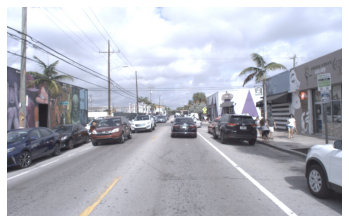

In [23]:
import matplotlib.pyplot as plt
plt.axis("off")
plt.imshow(image)

### profiling

In [26]:
%%time
for file in tqdm(files):
    imread(file)

100%|██████████| 469/469 [00:14<00:00, 33.24it/s]

CPU times: user 13.9 s, sys: 204 ms, total: 14.1 s
Wall time: 14.1 s


## Testing how much time doing the image loading offline saves

In [28]:
data_path = Path("/data/ges/argoverse-tracking/train1/S_0/ring_front_center/")
sorted_image_files = sorted(list(data_path.iterdir()), key=lambda p: int(p.stem.split("_")[-1]))

In [30]:
from imageio import imread
loaded_image_files = [imread(f) for f in tqdm(sorted_image_files)]

100%|██████████| 469/469 [00:28<00:00, 16.54it/s]


In [31]:
len(loaded_image_files)

469

### Profiling loading as pickle

In [36]:
with open("saved_pickle.pl", 'wb') as f:
    pickle.dump(loaded_image_files, f)

In [38]:
%%time
with open("saved_pickle.pl", 'rb') as f:
    pickle.load(f)

CPU times: user 688 ms, sys: 4.91 s, total: 5.6 s
Wall time: 6.08 s


### Profiling loading as npy

In [34]:
packaged_as_np = np.array(loaded_image_files)

In [39]:
packaged_as_np.shape

(469, 1200, 1920, 3)

In [40]:
np.save("saved_numpy", packaged_as_np)

In [42]:
%%time
result = np.load("saved_numpy.npy")

CPU times: user 0 ns, sys: 7.11 s, total: 7.11 s
Wall time: 7.51 s
